In [1]:
!pip install kagglehub



In [2]:
import kagglehub


In [3]:
path = kagglehub.dataset_download("ziya07/power-converters-in-electric-vehicles-dataset")

print("Path to dataset files:", path)


100%|██████████| 130k/130k [00:00<00:00, 48.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/power-converters-in-electric-vehicles-dataset/versions/1


In [4]:
import os
os.listdir(path)



['power_converter_optimization_dataset_1000.csv']

In [5]:
import pandas as pd

file_path = os.path.join(path, 'power_converter_optimization_dataset_1000.csv')
df = pd.read_csv(file_path)

df.head()


,Converter Type,V_in (V),V_out (V),I_out (A),f_sw (Hz),R_load (Ω),T_ambient (°C),Efficiency (η%),P_loss (W),T_converter (°C),L (H),C (F),Iter,Objective Function Value,Optimized (0/1),Δη (%),ΔT (°C)
0,Boost,54.168814,13.682802,3.618257,17918.858895,2.801118,26.750112,91.222866,14.087189,38.057330,0.002641,0.000140,66,0.921927,1,0.895222,0.124525
1,Buck,24.096025,12.225631,13.752536,9245.607673,2.844082,29.200395,89.031370,7.732979,31.937209,0.007893,0.000085,28,0.934177,0,8.533207,1.593479
2,Buck-Boost,25.261009,42.039435,19.604353,6909.053450,2.877528,33.740477,88.475410,11.186217,35.472417,0.003069,0.000090,51,0.920643,0,5.348863,0.391232
3,Buck-Boost,47.049567,20.375361,11.107481,18404.924848,4.525888,32.919439,82.239518,5.685935,44.635249,0.003616,0.000181,14,0.993005,0,4.155918,3.907030
4,Buck-Boost,29.230736,33.278792,5.067608,8729.243294,4.274510,38.946898,82.639420,8.806611,40.345691,0.009280,0.000067,57,0.900936,0,3.378649,4.624914


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Converter Type            1000 non-null   object 
 1   V_in (V)                  1000 non-null   float64
 2   V_out (V)                 1000 non-null   float64
 3   I_out (A)                 1000 non-null   float64
 4   f_sw (Hz)                 1000 non-null   float64
 5   R_load (Ω)                1000 non-null   float64
 6   T_ambient (°C)            1000 non-null   float64
 7   Efficiency (η%)           1000 non-null   float64
 8   P_loss (W)                1000 non-null   float64
 9   T_converter (°C)          1000 non-null   float64
 10  L (H)                     1000 non-null   float64
 11  C (F)                     1000 non-null   float64
 12  Iter                      1000 non-null   int64  
 13  Objective Function Value  1000 non-null   float64
 14  Optimized

,0
Converter Type,0
V_in (V),0
V_out (V),0
I_out (A),0
f_sw (Hz),0
R_load (Ω),0
T_ambient (°C),0
Efficiency (η%),0
P_loss (W),0
T_converter (°C),0


In [7]:
# Check for missing values
df.isnull().sum()

# Drop any rows with missing values (if there are few)
df = df.dropna()

# Check the unique converter types
print(df['Converter Type'].unique())

# Convert categorical column 'Converter Type' to numbers
df = pd.get_dummies(df, columns=['Converter Type'], drop_first=True)

# Display cleaned data
df.head()


['Boost' 'Buck' 'Buck-Boost']


,V_in (V),V_out (V),I_out (A),f_sw (Hz),R_load (Ω),T_ambient (°C),Efficiency (η%),P_loss (W),T_converter (°C),L (H),C (F),Iter,Objective Function Value,Optimized (0/1),Δη (%),ΔT (°C),Converter Type_Buck,Converter Type_Buck-Boost
0,54.168814,13.682802,3.618257,17918.858895,2.801118,26.750112,91.222866,14.087189,38.057330,0.002641,0.000140,66,0.921927,1,0.895222,0.124525,False,False
1,24.096025,12.225631,13.752536,9245.607673,2.844082,29.200395,89.031370,7.732979,31.937209,0.007893,0.000085,28,0.934177,0,8.533207,1.593479,True,False
2,25.261009,42.039435,19.604353,6909.053450,2.877528,33.740477,88.475410,11.186217,35.472417,0.003069,0.000090,51,0.920643,0,5.348863,0.391232,False,True
3,47.049567,20.375361,11.107481,18404.924848,4.525888,32.919439,82.239518,5.685935,44.635249,0.003616,0.000181,14,0.993005,0,4.155918,3.907030,False,True
4,29.230736,33.278792,5.067608,8729.243294,4.274510,38.946898,82.639420,8.806611,40.345691,0.009280,0.000067,57,0.900936,0,3.378649,4.624914,False,True


In [8]:
df.columns




Index(['V_in (V)', 'V_out (V)', 'I_out (A)', 'f_sw (Hz)', 'R_load (Ω)',
       'T_ambient (°C)', 'Efficiency (η%)', 'P_loss (W)', 'T_converter (°C)',
       'L (H)', 'C (F)', 'Iter', 'Objective Function Value', 'Optimized (0/1)',
       'Δη (%)', 'ΔT (°C)', 'Converter Type_Buck',
       'Converter Type_Buck-Boost'],
      dtype='object')

In [9]:
# Split the dataset into features and target
X = df.drop('Optimized (0/1)', axis=1)
y = df['Optimized (0/1)']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800
Testing samples: 200


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create model
model = RandomForestClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0

Confusion Matrix:
 [[153   0]
 [  0  47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



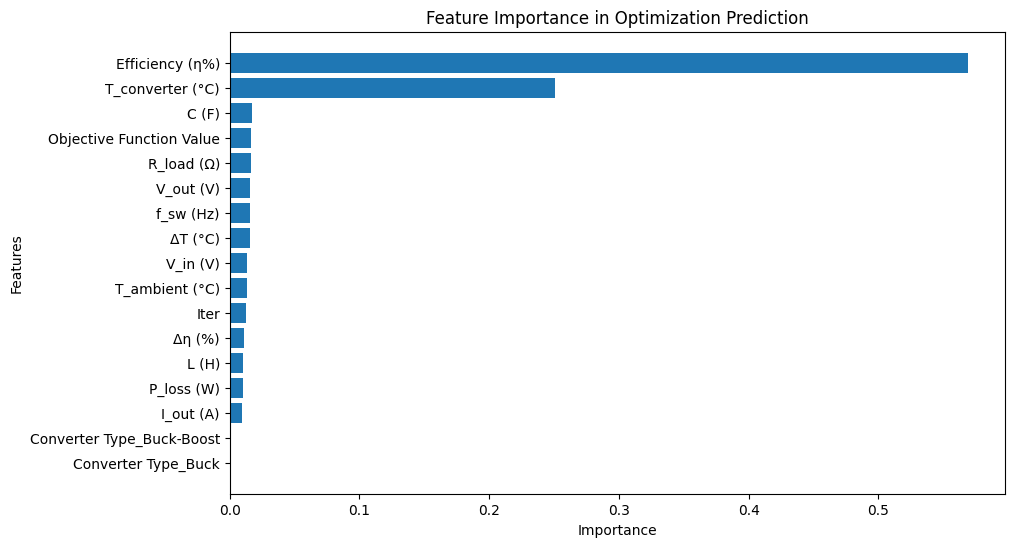

In [12]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

# Sort features by importance
indices = importance.argsort()

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance in Optimization Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



In [13]:
import joblib

joblib.dump(model, 'ev_fault_detection_model.pkl')


['ev_fault_detection_model.pkl']

In [14]:
!pip install streamlit
!pip install pyngrok



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.1 MB/s eta 0:00:00


In [15]:
import joblib
joblib.dump(model, 'ev_fault_detection_model.pkl')



['ev_fault_detection_model.pkl']

In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('ev_fault_detection_model.pkl')

st.set_page_config(page_title="EV Power Converter Optimization", layout="wide")

st.title("⚡ EV Power Converter Optimization Predictor")
st.markdown("Predict whether a power converter setup will succeed or fail optimization.")

# Input fields for user
V_in = st.number_input("Input Voltage (V)", min_value=0.0)
V_out = st.number_input("Output Voltage (V)", min_value=0.0)
I_out = st.number_input("Output Current (A)", min_value=0.0)
f_sw = st.number_input("Switching Frequency (Hz)", min_value=0.0)
R_load = st.number_input("Load Resistance (Ω)", min_value=0.0)
T_ambient = st.number_input("Ambient Temperature (°C)", min_value=0.0)
Efficiency = st.number_input("Efficiency (%)", min_value=0.0)
P_loss = st.number_input("Power Loss (W)", min_value=0.0)
T_converter = st.number_input("Converter Temperature (°C)", min_value=0.0)

# Dropdown for converter type
converter_type = st.selectbox("Converter Type", ["Buck", "Boost", "Buck-Boost"])

# Create dataframe for prediction
input_data = pd.DataFrame({
    'V_in (V)': [V_in],
    'V_out (V)': [V_out],
    'I_out (A)': [I_out],
    'f_sw (Hz)': [f_sw],
    'R_load (Ω)': [R_load],
    'T_ambient (°C)': [T_ambient],
    'Efficiency (η%)': [Efficiency],
    'P_loss (W)': [P_loss],
    'T_converter (°C)': [T_converter],
    'Converter Type_Boost': [1 if converter_type == "Boost" else 0],
    'Converter Type_Buck-Boost': [1 if converter_type == "Buck-Boost" else 0]
})

# Predict button
if st.button(" Predict Optimization Success"):
    result = model.predict(input_data)[0]
    if result == 1:
        st.success(" Optimization Successful! Converter is performing efficiently.")
    else:
        st.error(" Optimization Failed. Check converter parameters or thermal conditions.")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.239.201.145:8501

